In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Aperiodic Models and sample fitting

In [47]:
def linear_model(x, b, c):
    # b: slope, c: intercpet
    # the parameters are named so that they are consistent with the quadratic model
    return b * x + c


def linear_model_log_prior(theta):
    return 0.0  # no prior restirction for now


def linear_model_log_likelihood(theta, x, y, yerr):
    model = linear_model(x, *theta)
    return -0.5 * np.sum((y - model) ** 2 / (yerr**2))


def linear_model_log_probability(theta, x, y, yerr):

    # check that the priors are satisfied
    lp = linear_model_log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + linear_model_log_likelihood(theta, x, y, yerr)


def quadratic_model(x, a, b, c):
    # a: quadratic coefficient , b: linear coefficent, c: constant coefficient
    return a * x * x + b * x + c

### Sythetic data

In [60]:
# helper functions for plotting

import inspect

def rmse(model, actual):
    return np.sqrt(np.sum(np.square(np.abs(model - actual))) / len(actual))


def get_model_param_names(model_func):
    # skip the first paramter, which is x:
    return list(inspect.signature(model_func).parameters.keys())[1:]

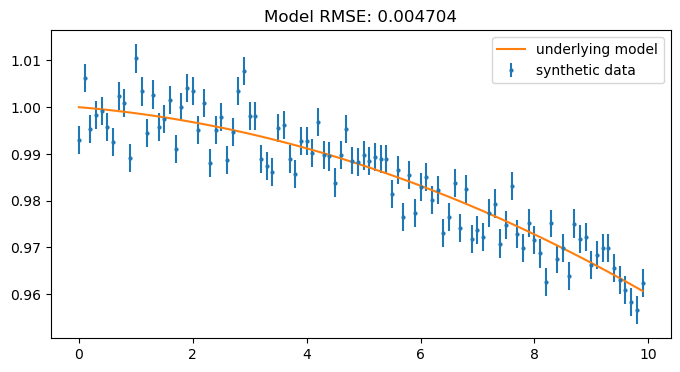

In [93]:
rng = np.random.default_rng(12345)

time = np.arange(0, 10, 0.1)
# model_flux_pure = linear_model(time, -0.005, 1)
model_flux_pure = quadratic_model(time, -0.0003, -0.001, 1)
flux = model_flux_pure + rng.normal(loc=0, scale=0.005, size=len(time))  # add some random noise
flux_err = rng.normal(loc=0.003, scale=0.00001, size=len(time))

ax = plt.figure(figsize=(8, 4)).gca();
ax.errorbar(time, flux, yerr=flux_err, linestyle="none", fmt="o", markersize=2, label="synthetic data");
ax.plot(time, model_flux_pure, label="underlying model");
ax.set_title(f"Model RMSE: {rmse(model_flux_pure, flux):.6f}");
ax.legend();
# ^^^ the base RMSE reflecting the nature of the data noises



b: -0.004038229533890997 +- 0.00010396055652636963
c: 1.0050517381591209 +- 0.0005956109228424136


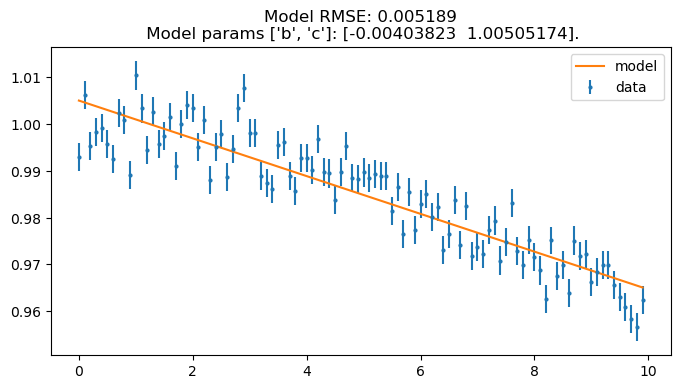

In [ ]:
from scipy.optimize import curve_fit

# 3. Use curve_fit to find optimal parameters
# popt contains the optimal parameters (a, b)
# pcov contains the estimated covariance of popt
popt, pcov = curve_fit(
    linear_model, time, flux, sigma=flux_err, absolute_sigma=True,
    p0=(0, 1),  # initial guess
    nan_policy="omit",
)
perr = np.sqrt(np.diag(pcov))  # convert covaraince matrix to uncertaintiy in standard error
for _n, _v, _e in zip(get_model_param_names(linear_model), popt, perr):
    print(f"{_n}: {_v} +- {_e}")


model_flux = linear_model(time, *popt)


ax = plt.figure(figsize=(8, 4)).gca();
ax.errorbar(time, flux, yerr=flux_err, linestyle="none", fmt="o", markersize=2, label="data");
ax.plot(time, model_flux, label="model");
ax.set_title(f"Model RMSE: {rmse(model_flux, flux):.6f}\n Model params {get_model_param_names(linear_model)}: {popt}.")
ax.legend();


a: -0.0002966518863999975 +- 4.024072082053098e-05
b: -0.0011014819054171376 +- 0.00041171037967151935
c: 1.0002543625946785 +- 0.0008821811057641771


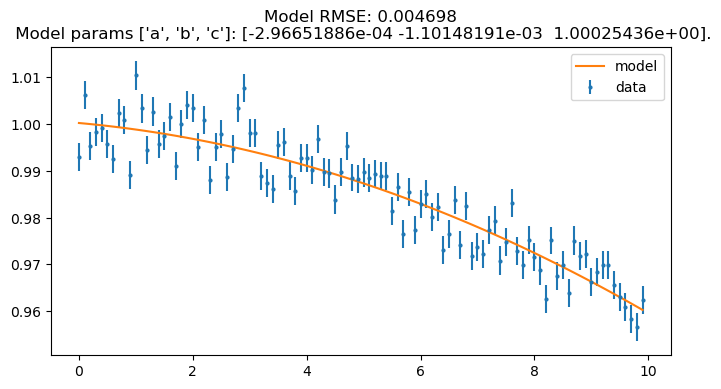

In [ ]:
from scipy.optimize import curve_fit

# 3. Use curve_fit to find optimal parameters
# popt contains the optimal parameters (a, b)
# pcov contains the estimated covariance of popt
popt, pcov = curve_fit(
    quadratic_model, time, flux, sigma=flux_err, absolute_sigma=True,
    p0=(0, 0, 1),  # initial guess
    nan_policy="omit",
)
perr = np.sqrt(np.diag(pcov))  # convert covaraince matrix to uncertaintiy in standard error
for _n, _v, _e in zip(get_model_param_names(quadratic_model), popt, perr):
    print(f"{_n}: {_v} +- {_e}")

model_flux = quadratic_model(time, *popt)


ax = plt.figure(figsize=(8, 4)).gca();
ax.errorbar(time, flux, yerr=flux_err, linestyle="none", fmt="o", markersize=2, label="data");
ax.plot(time, model_flux, label="model");
ax.set_title(f"Model RMSE: {rmse(model_flux, flux):.6f}\n Model params {get_model_param_names(quadratic_model)}: {popt}.")
ax.legend();


In [ ]:
import etv_functions

etv_functions.run_mcmc_initial_fit_of_model(linear_model_log_probability, linear_model, )